<a href="https://colab.research.google.com/github/atuhairwemurungi/week2-3/blob/main/Week_2_%26_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 2: Data Manipulation and Analysis using Pandas

In [154]:
# Import all the necessary packages for data anlaysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer
from scipy.stats import ttest_ind



In [155]:
# Mount the drive and load the data from the drive with a separator (;) so the data appears in tabular form

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
wine_data = pd.read_csv('/content/drive/MyDrive/Wine/winequality-red.csv', sep=';')

In [157]:
# Check how the data looks like by checking for the top, bottom records and the summary

wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [158]:
wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [159]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [160]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [161]:
# Check for missing values

print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [162]:
print(wine_data.isnull().values.any())

False


There are no missing values in the wine dataset, because it has returned zero for all the columns and False, implying that there is no any missing value.

In [163]:
# Before doing any analysis, change the column labels to remove the spaces between words.

new_data = wine_data.rename(
    columns={
        'fixed acidity': 'fixed_acidity',
        'volatile acidity': 'volatile_acidity',
        'citric acid': 'citric_acid',
        'residual sugar': 'residual_sugar',
        'free sulfur dioxide': 'free_sulfur_dioxide',
        'total sulfur dioxide': 'total_sulfur_dioxide'
    }
)

Data Cleaning

There no columns to drop, because as per cell 6, all values are numerical; floats and integers

There is also no missing data in the wine dataset, so can't use .fillna(), .dropna(), or any imputation strategy

In [164]:
# Remove duplicates if any
# First check if there is duplicates

wine_data.duplicated().sum()

np.int64(240)

In [165]:
wine_data[wine_data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [166]:
# Remove the duplicates
wine_data = wine_data.drop_duplicates()

In [167]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


The dataset now has 1359 entries, after removing the 240 duplicate values

Detect and remove outliers using the IQR method and Z- score

In [168]:
# Z- score
outliers = np.abs((new_data.drop('quality', axis=1) - new_data.drop('quality', axis=1).mean()) / new_data.drop('quality', axis=1).std())

print('outliers > 3:')
display((outliers > 3).sum())

outliers > 3:


,0
fixed_acidity,12
volatile_acidity,10
citric_acid,1
residual_sugar,30
chlorides,31
free_sulfur_dioxide,22
total_sulfur_dioxide,15
density,18
pH,8
sulphates,27


These are the outliers per column that are greater than 3. Using the z score method, 3 is the threshold.

In [169]:
outlier_mask = (outliers > 3).any(axis=1)
clean_data = new_data[~outlier_mask]
print('Shape of data before:', new_data.shape)
print('\nShape of data after:', clean_data.shape)
print('\Rows removed',len(new_data) - len(clean_data))

Shape of data before: (1599, 12)

Shape of data after: (1458, 12)
\Rows removed 141


Created a new dataframe, clean_data that doesn't have outliers. The outlier_mask has created like a shield to block the outliers, so that they don't display.

Looking at the shape of the data before, there were 1599 values, and the shape of the data after the mask, shows that there is 1458 rows, implying that 141 rows have been removed from the data, because they had outliers.

In [170]:
#Using the IQR method

q1 = new_data['quality'].quantile(0.25)
q3 = new_data['quality'].quantile(0.75)

diff = q3 - q1
cleaned_data = new_data[(new_data['quality'] >= (q1 - 1.5 * diff)) & (new_data['quality'] <= (q3 + 1.5 * diff))]
print(cleaned_data)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

The IQR method has removed 28 rows that had outliers and remained with 1571 clean rows.

In [171]:
# Create a new column showing the sulfur ratio, and reduce the decimal points to 2, with round(2)

clean_data['sulfur_ratio'] = (clean_data['free_sulfur_dioxide'] / (clean_data['total_sulfur_dioxide'])).round(2)

clean_data.head()

<ipython-input-171-077b94040386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sulfur_ratio'] = (clean_data['free_sulfur_dioxide'] / (clean_data['total_sulfur_dioxide'])).round(2)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.37
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.28
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.28
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32


Feature Engineering

In [172]:
# Using the StandardScaler,
# First drop the columns that i don't need in the data: quality and sulfur_ratio

scaler = StandardScaler()

X_scaled = scaler.fit_transform(clean_data.drop(['quality', 'sulfur_ratio'], axis=1))

In [173]:
# Using the MinMaxScaler
# Quality and sulfur_ratio are dropped because they are target values. The ones the model will predict.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clean_data.drop(['quality', 'sulfur_ratio'], axis=1))


After scaling, change the array back to a data frame in order to visualise it, hence the X_scaled_df

In [174]:
X_scaled_df = pd.DataFrame(X_scaled, columns = [col for col in clean_data.columns if col not in ['quality', 'sulfur_ratio']])

In [175]:
X_scaled_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.192308
1,0.329412,0.826087,0.000000,0.254545,0.319149,0.521739,0.438849,0.495327,0.367816,0.421687,0.269231
2,0.329412,0.695652,0.050633,0.200000,0.287234,0.304348,0.345324,0.514019,0.436782,0.385542,0.269231
3,0.729412,0.173913,0.708861,0.127273,0.196809,0.347826,0.388489,0.607477,0.321839,0.301205,0.269231
4,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.192308


In [176]:
pd.get_dummies(X_scaled_df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.192308
1,0.329412,0.826087,0.000000,0.254545,0.319149,0.521739,0.438849,0.495327,0.367816,0.421687,0.269231
2,0.329412,0.695652,0.050633,0.200000,0.287234,0.304348,0.345324,0.514019,0.436782,0.385542,0.269231
3,0.729412,0.173913,0.708861,0.127273,0.196809,0.347826,0.388489,0.607477,0.321839,0.301205,0.269231
4,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.192308
...,...,...,...,...,...,...,...,...,...,...,...
1453,0.141176,0.521739,0.101266,0.145455,0.276596,0.673913,0.273381,0.317757,0.655172,0.301205,0.403846
1454,0.105882,0.467391,0.126582,0.181818,0.127660,0.826087,0.323741,0.338318,0.735632,0.518072,0.538462
1455,0.152941,0.423913,0.164557,0.200000,0.202128,0.608696,0.244604,0.396262,0.620690,0.506024,0.500000
1456,0.105882,0.570652,0.151899,0.145455,0.196809,0.673913,0.273381,0.371028,0.793103,0.457831,0.346154


All values are numeric. There are no categoric values to be transformed by the get_dummies().

In [177]:
# Add a new categorical column that grades quality into, low medium and high, using -1 as the lower bound

clean_data['quality_category'] = pd.cut(clean_data['quality'], bins=[-1,4,6,10], labels=['Low', 'Medium', 'High'])

<ipython-input-177-b10f73cf29ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['quality_category'] = pd.cut(clean_data['quality'], bins=[-1,4,6,10], labels=['Low', 'Medium', 'High'])


In [178]:
clean_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.37,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.28,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.28,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32,Medium


Group data by quality_category and compute the average of alcohol, pH, and sulphates.


In [179]:
groups = clean_data.groupby('quality_category')[['alcohol', 'pH', 'sulphates']].mean()

groups

<ipython-input-179-b1a00c2a2409>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = clean_data.groupby('quality_category')[['alcohol', 'pH', 'sulphates']].mean()


,alcohol,pH,sulphates
quality_category,,,
Low,10.107407,3.375185,0.578333
Medium,10.247825,3.318188,0.628479
High,11.518491,3.288109,0.743035


In [181]:
# Pivot table to summarize alcohol against quality_category and sulphates

pivot = clean_data.pivot_table(values='alcohol', index='quality_category', columns='sulphates')
print(pivot)

sulphates         0.33  0.37  0.39       0.40  0.42      0.43       0.44  \
quality_category                                                           
Low                9.1  10.4   NaN        NaN   NaN  9.050000   9.600000   
Medium             NaN  13.0  10.2  11.633333  9.52  9.733333  10.158333   
High               NaN   NaN   NaN        NaN   NaN       NaN        NaN   

sulphates         0.45      0.46     0.47  ...  1.04  1.05  1.06  1.07  1.08  \
quality_category                           ...                                 
Low                NaN   9.60000  10.0000  ...   NaN   NaN   NaN   NaN   9.2   
Medium            9.64  10.19375   9.7875  ...  10.6   9.4  10.2   9.5   NaN   
High               NaN       NaN  10.0000  ...  10.9  10.8   NaN   NaN   NaN   

sulphates         1.10  1.11  1.12  1.13  1.16  
quality_category                                
Low                NaN   NaN   9.1   NaN   NaN  
Medium             NaN  11.0   NaN   NaN  10.6  
High              10.0

<ipython-input-181-e5b854dcea6f>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = clean_data.pivot_table(values='alcohol', index='quality_category', columns='sulphates')


Data Visualisation

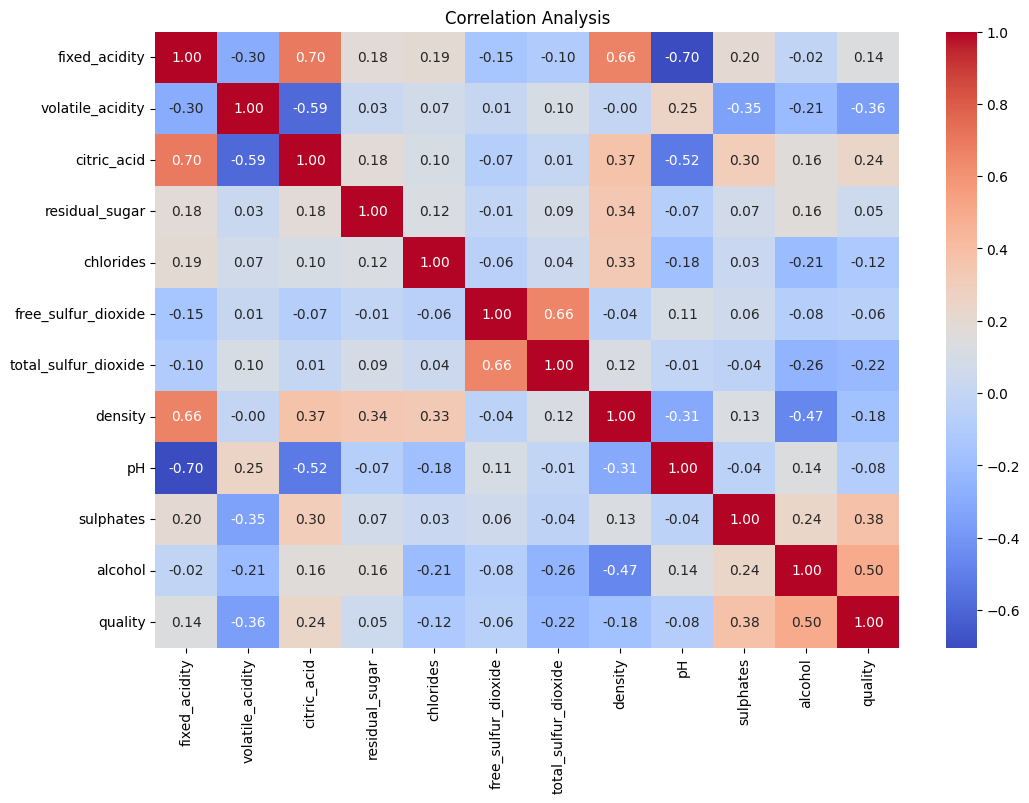

In [182]:
# Heatmap for correlation, dropped the 'quality_category'

plt.figure(figsize=(12, 8))
sns.heatmap((clean_data.drop(['quality_category', 'sulfur_ratio'], axis=1)).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis')
plt.show()


Citric acid and fixed acidity have an almost perfect correlation, because 0.70 is closer to 1, meaning that an increase in ctric acid, would cause an increase in the fixed acidity. The same applies to density and fixed acidity, at 0.66, and quality with alcohol, at 0.50.

Citric acid and volatile acidity have an almost perfect negative correlation,where an increase in one element, causes a decrease in the other, and this applies to pH with fixed acidity, and citric acid with volatile acidity.

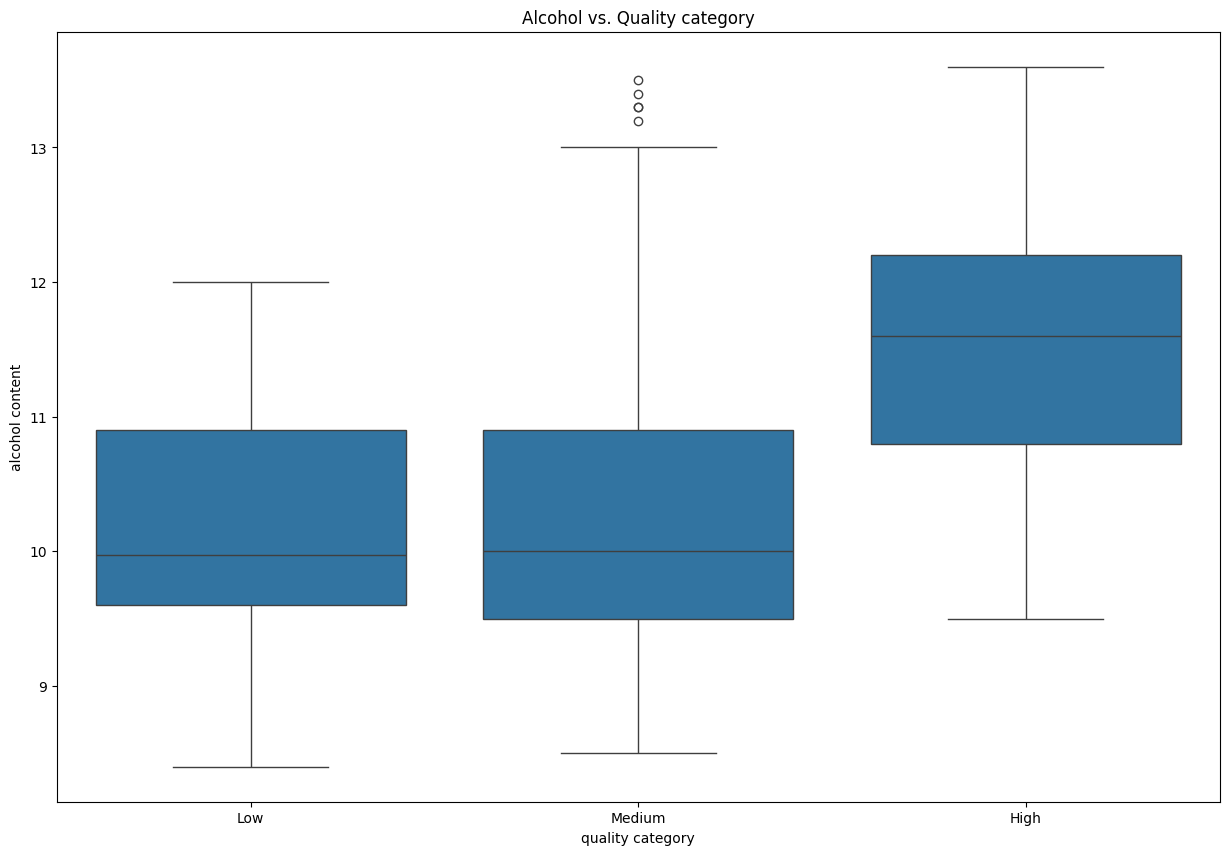

In [183]:
# Boxplot

plt.figure(figsize=(15, 10))
sns.boxplot(x='quality_category', y='alcohol', data = clean_data)
plt.title('Alcohol vs. Quality category')
plt.xlabel('quality category')
plt.ylabel('alcohol content')
plt.show()


The box plot shows that there is outliers in the upper quatile of the medium category.

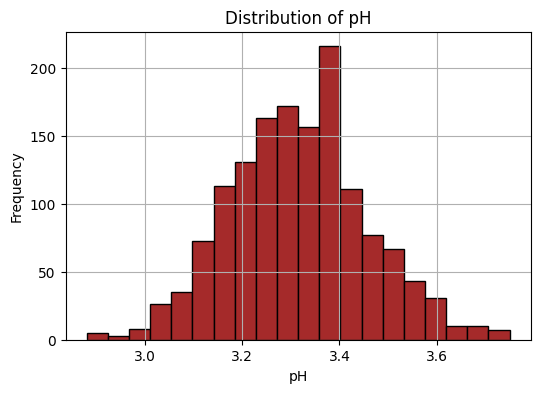

In [184]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(clean_data['pH'], bins=20, color = 'brown', edgecolor = 'black')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram shows the distibution of the pH levels in the wine bottles. All the wine falls between the pH levels approximately 2.6 and 3.8, however, around 200+ bottles habve a pH OF 3.4, and a few bottles with 2.8.

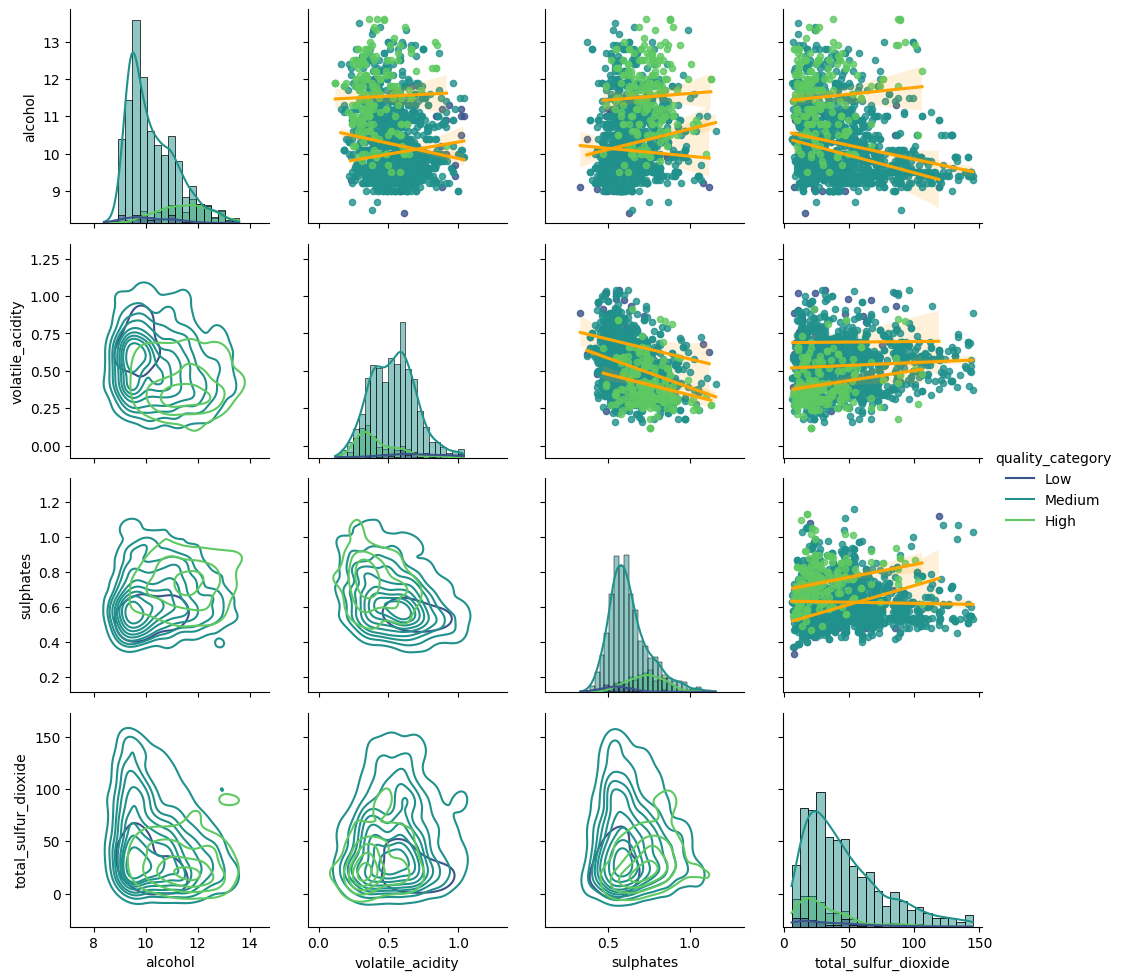

In [185]:
# PairGrid with scatter plot

data = sns.PairGrid(
    clean_data,
    vars = ['alcohol', 'volatile_acidity', 'sulphates', 'total_sulfur_dioxide'],
    hue = 'quality_category',
    palette = 'viridis'
)

data.map_upper(sns.regplot, line_kws={'color':'orange'}, scatter_kws={'s':20})
data.map_lower(sns.kdeplot)
data.map_diag(sns.histplot, kde=True)
data.add_legend()
plt.show()

The pair grid of the scatterplot, histogram, and kde show how the 4 relate with each other, and how that affects the quality of the wine. The kde plots of alcohol with volatile acidity and fixed acidity is skewed towards the left, the lines are tighter, implying that an increase in one, will decrease the other. With sulphates and volatile acidity, the lines are evenly distributed wich would mean that an increase in volatile acidity would cause an increase in sulphates.

The histograms, super imposed with the kde, show that majority of the wine bottles areof medium quality, compared to the high quality bottles, across all elements.

And the scatterplots with the lines of best fir for all the 3 categories of quality_category.

Part 4: Basic Statistical Analysis

In [186]:
X_scaled_df.skew()

,0
fixed_acidity,0.820879
volatile_acidity,0.392097
citric_acid,0.292600
residual_sugar,2.450707
chlorides,2.307274
free_sulfur_dioxide,0.869727
total_sulfur_dioxide,1.185230
density,0.055543
pH,0.113039
sulphates,0.893297


In [187]:
X_scaled_df.kurt()


,0
fixed_acidity,0.234071
volatile_acidity,-0.063873
citric_acid,-0.918459
residual_sugar,7.121928
chlorides,10.537075
free_sulfur_dioxide,0.110263
total_sulfur_dioxide,0.975775
density,0.190431
pH,0.047470
sulphates,0.829377


In [188]:
skew_vals = X_scaled_df.apply(skew)
kurt_vals = X_scaled_df.apply(kurtosis)

<ipython-input-189-e5d7e5e91473>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_vals.index, y=skew_vals, palette='Blues_d')


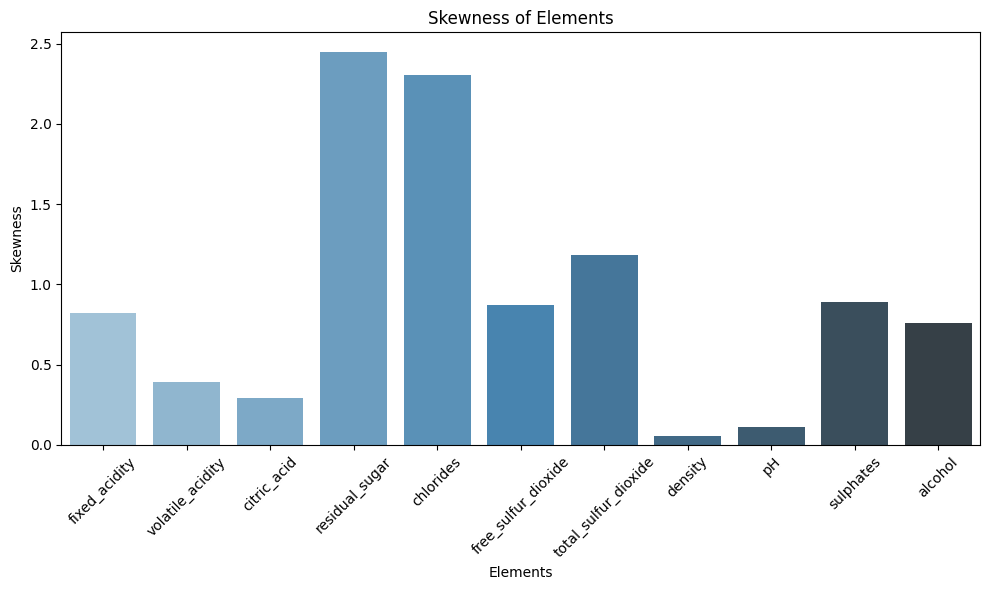

In [189]:
plt.figure(figsize=(10,6))
sns.barplot(x=skew_vals.index, y=skew_vals, palette='Blues_d')
plt.title('Skewness of Elements')
plt.ylabel('Skewness')
plt.xlabel('Elements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-190-54c0fdacd5f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurt_vals.index, y=kurt_vals, palette='Purples_d')


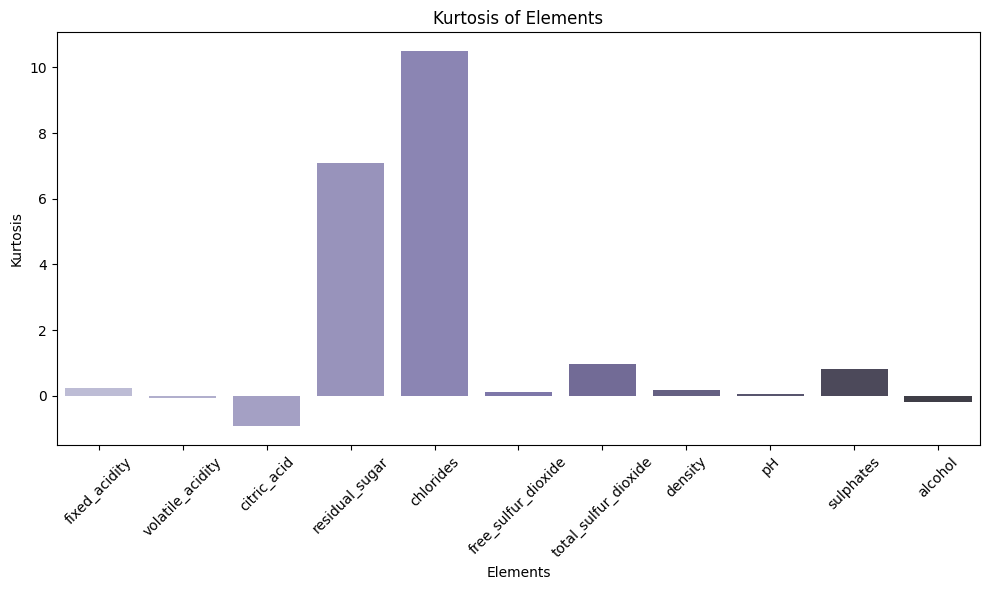

In [190]:
plt.figure(figsize=(10,6))
sns.barplot(x=kurt_vals.index, y=kurt_vals, palette='Purples_d')
plt.title('Kurtosis of Elements')
plt.ylabel('Kurtosis')
plt.xlabel('Elements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With both Kurtosis and Skewness, they show that residual sugar and chlorides are more positively skewed, and there are outliers.

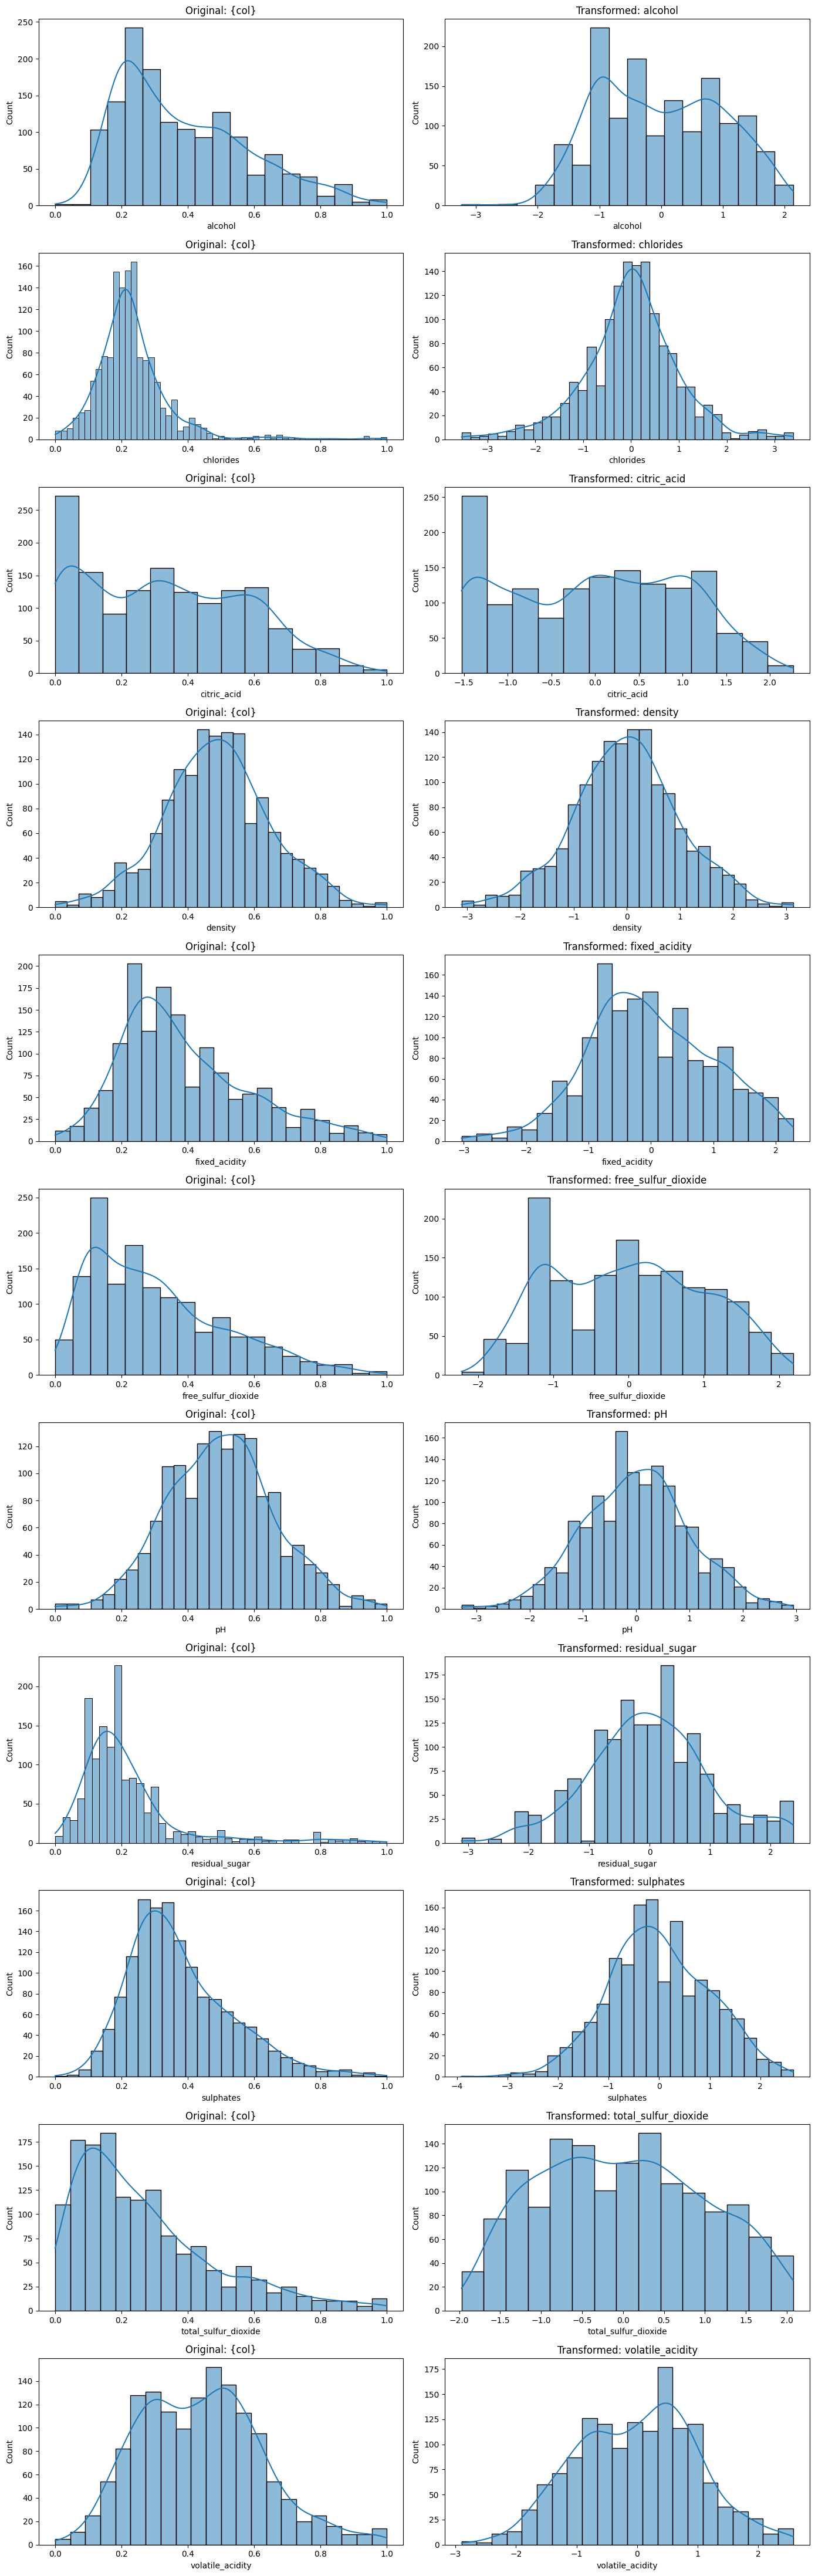

In [191]:
high_skew = skew_vals[abs(skew_vals)>0]
high_kurt = kurt_vals[abs(kurt_vals) >3]

skewed_features = high_kurt.index.union(high_skew.index)

# Apply Yeo-Johnson to transform the data-->neagtive?zero values
pt = PowerTransformer(method='yeo-johnson')
transformed_data =X_scaled_df.copy()
transformed_data[skewed_features] = pt.fit_transform(transformed_data[skewed_features])

#Comparison of Before and After Skewness
fig, axes = plt.subplots(len(skewed_features), 2, figsize = (14, 4 * len(skewed_features)))
for i, col in enumerate(skewed_features):
  sns.histplot(X_scaled_df[col], ax=axes[i, 0], kde=True).set_title('Original: {col}')
  sns.histplot(transformed_data[col], ax=axes[i, 1], kde=True).set_title(f'Transformed: {col}')
plt.tight_layout()
plt.show()

There is not much of a difference after transformation. Like the bar plot had shown, only  residual sugar and chlorides were the extreme outliers and with kurtosis, all elements were close to 0, except residual sugar and chlorides.
 However, the curves have been normalised a little bit, like in total sulfur dioxide, it was stending towards the left and after transformation it is normalised.

Perform a t-test to compare alcohol content between high and low-quality wine.

Start by extracting aclohol values for high and low quality wine from quality_category

In [195]:
high_quality_alcohol = clean_data[clean_data['quality_category']== 'High']['alcohol']

low_quality_alcohol = clean_data[clean_data['quality_category']== 'Low']['alcohol']

t_test, p_value = ttest_ind(high_quality_alcohol, low_quality_alcohol, equal_var=False)

print(f'T-statistic: {t_test:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
  print('Result: Statistically significant difference in alcohol content between low and high quality wines')
else:
  print('Result: No statistically significant difference in alcohol content between low and high quality wines')





T-statistic: 10.6557
P-value: 0.0000
Result: Statistically significant difference in alcohol content between low and high quality wines


There is a statistically, significant difference in alcohol content between high- and low-quality wines, given that the p-value (0.0000) is below the 0.05 threshold.
The T-statistic (10.6557) means there is a substantial difference between the two categories.

Since the p-value is so small, i reject the null hypothesis, indicating that alcohol content varies significantly between high- and low-quality wines.

In [196]:
X = clean_data['alcohol']
y = clean_data['quality']


X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_best = np.linalg.lstsq(X_b, y, rcond=None)[0]


intercept = theta_best[0]
slope = theta_best[1]
print(f'Intrcept: {intercept:.4f}')
print(f'Slope: {slope:.4f}')



Intrcept: 1.5822
Slope: 0.3902


The Intercept represents the expected wine quality when alcohol content is zero.

The slope shows how much quality increases per unit increase in alcohol content.

Since the slope is 0.3902, in this case, alcohol does affect the wine quality, but its influence is moderate, since the slope is closer to 0.

Plot of the Linear Regession

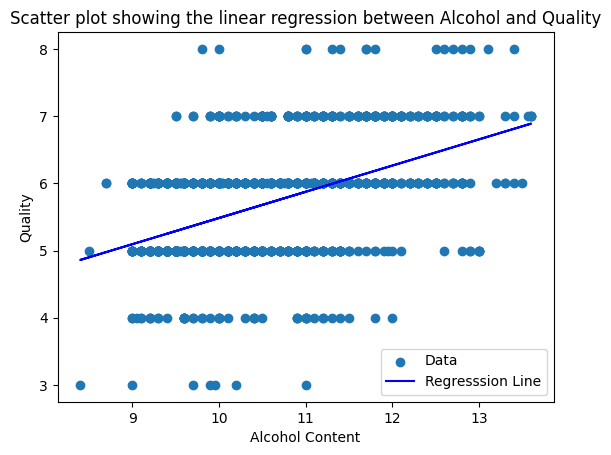

In [197]:
plt.scatter(X,y, label='Data')
plt.plot(X, X_b.dot(theta_best), color='blue', label='Regresssion Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Scatter plot showing the linear regression between Alcohol and Quality')
plt.legend()
plt.show()